<a href="https://colab.research.google.com/github/DurgaArun88/FraudDetectionAssignment/blob/main/FraudDetectionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/fraud_data - Sheet 1.csv')

In [3]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0


In [5]:
df['Time'] = pd.to_timedelta(df['Time'], unit = 's')

In [6]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,0 days 13:13:25,Houston,Travel,18.0,0
1,2,950.76,0 days 10:34:48,Los Angeles,Electronics,28.0,0
2,3,732.26,0 days 21:52:32,Miami,Travel,20.0,0
3,4,599.06,0 days 15:21:24,New York,Groceries,69.0,0
4,5,156.86,0 days 15:50:43,New York,Groceries,79.0,0


In [7]:
df['Time'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,13,13,25,0,0,0
1,0,10,34,48,0,0,0
2,0,21,52,32,0,0,0
3,0,15,21,24,0,0,0
4,0,15,50,43,0,0,0
...,...,...,...,...,...,...,...
495,0,13,32,50,0,0,0
496,0,21,50,23,0,0,0
497,0,21,0,29,0,0,0
498,0,14,36,43,0,0,0


In [8]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,0 days 13:13:25,Houston,Travel,18.0,0
1,2,950.76,0 days 10:34:48,Los Angeles,Electronics,28.0,0
2,3,732.26,0 days 21:52:32,Miami,Travel,20.0,0
3,4,599.06,0 days 15:21:24,New York,Groceries,69.0,0
4,5,156.86,0 days 15:50:43,New York,Groceries,79.0,0


In [9]:
df.shape

(500, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   TransactionID     500 non-null    int64          
 1   Amount            475 non-null    float64        
 2   Time              500 non-null    timedelta64[ns]
 3   Location          475 non-null    object         
 4   MerchantCategory  500 non-null    object         
 5   CardHolderAge     476 non-null    float64        
 6   IsFraud           500 non-null    int64          
dtypes: float64(2), int64(2), object(2), timedelta64[ns](1)
memory usage: 27.5+ KB


In [11]:
df.isnull().sum()

,0
TransactionID,0
Amount,25
Time,0
Location,25
MerchantCategory,0
CardHolderAge,24
IsFraud,0


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
TransactionID,0
Amount,0
Time,0
Location,0
MerchantCategory,0
CardHolderAge,0
IsFraud,0


In [16]:
df.shape

(432, 7)

In [17]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,TransactionID,Amount,Time,CardHolderAge,IsFraud
count,432.000000,432.000000,432,432.000000,432.000000
mean,252.643519,654.726754,0 days 11:28:17.571759259,47.699074,0.053241
std,145.452196,1090.422011,0 days 07:03:31.360473023,18.828625,0.224773
min,1.000000,6.060000,0 days 00:00:55,5.000000,0.000000
25%,125.750000,244.265000,0 days 05:17:59.250000,32.000000,0.000000
50%,253.500000,519.910000,0 days 11:19:32,47.000000,0.000000
75%,379.250000,776.822500,0 days 17:37:43.250000,63.000000,0.000000
max,500.000000,9691.578643,0 days 23:54:26,120.000000,1.000000


In [18]:
# Handling imbalanced data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [28]:
columns_to_scale = ['TransactionID', 'Amount', 'CardHolderAge']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [29]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,-1.732083,-0.256672,0 days 13:13:25,Houston,Travel,-1.579165,0
1,-1.725200,0.271800,0 days 10:34:48,Los Angeles,Electronics,-1.047443,0
2,-1.718317,0.071186,0 days 21:52:32,Miami,Travel,-1.472821,0
3,-1.711434,-0.051110,0 days 15:21:24,New York,Groceries,1.132617,0
4,-1.704551,-0.457111,0 days 15:50:43,New York,Groceries,1.664339,0


<Axes: xlabel='Amount', ylabel='IsFraud'>

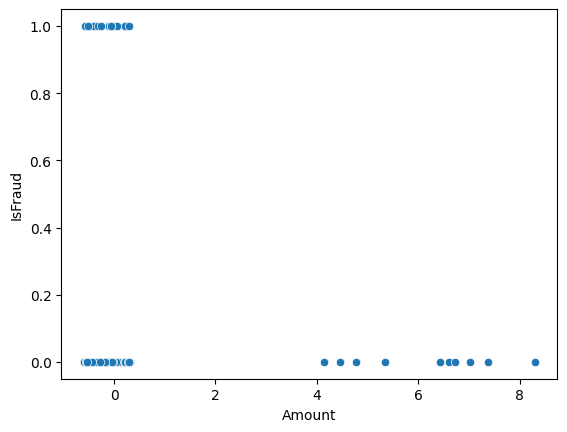

In [36]:
sns.scatterplot(x = 'Amount', y = 'IsFraud', data = df)

In [40]:
X = df.drop(columns = ['IsFraud', 'Time'])
X = pd.get_dummies(X, columns=['Location', 'MerchantCategory'], drop_first=True)

In [41]:
y = df['IsFraud']

In [64]:
X.shape

(432, 11)

In [65]:
y.shape

(432,)

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [68]:
y_res.value_counts()

,count
IsFraud,
0,409
1,409


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score

In [84]:
classifier = {
    'Logistic Regression': LogisticRegression(class_weight="balanced"),
    'Random Forest Classifier': RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()
}
for name, clf in classifier.items():
  print(f"\n--- {name} ----")
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  y_prob =clf.predict_proba(X_test)[:,-1]
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score: {precision_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print("ROC-AUC:", roc_auc_score(y_test, y_prob))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Logistic Regression ----
Accuracy Score: 0.5287356321839081
Precision Score: 0.05
              precision    recall  f1-score   support

           0       0.94      0.54      0.68        82
           1       0.05      0.40      0.09         5

    accuracy                           0.53        87
   macro avg       0.49      0.47      0.39        87
weighted avg       0.89      0.53      0.65        87

ROC-AUC: 0.4097560975609756
Confusion Matrix:
 [[44 38]
 [ 3  2]]

--- Random Forest Classifier ----
Accuracy Score: 0.9425287356321839
Precision Score: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        82
           1       0.00      0.00      0.00         5

    accuracy                           0.94        87
   macro avg       0.47      0.50      0.49        87
weighted avg       0.89      0.94      0.91        87

ROC-AUC: 0.43170731707317067
Confusion Matrix:
 [[82  0]
 [ 5  0]]

--- Gradient Boosting Classifier -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier()